In [1]:
import numpy as np
import cv2 as cv

f = np.array([[0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 180, 90, 90, 180, 90, 0],
              [0, 0, 180, 90, 180, 180, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])
k = 1/9*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
g = cv.filter2D(f.astype(np.float32), -1, k.astype(np.float32))
print(g)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 20. 30. 40. 40. 40. 30. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 20. 30. 50. 50. 40. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


### Average Filtering using loops.

True

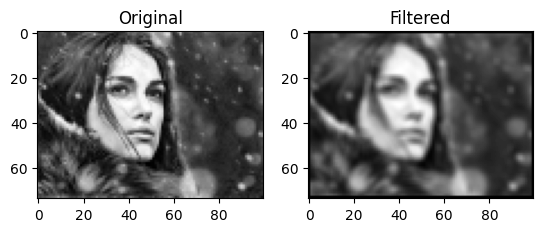

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())         
    return result
    
img = cv.imread('Images-20240703/keira_gray.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)

### Average using Filt2D

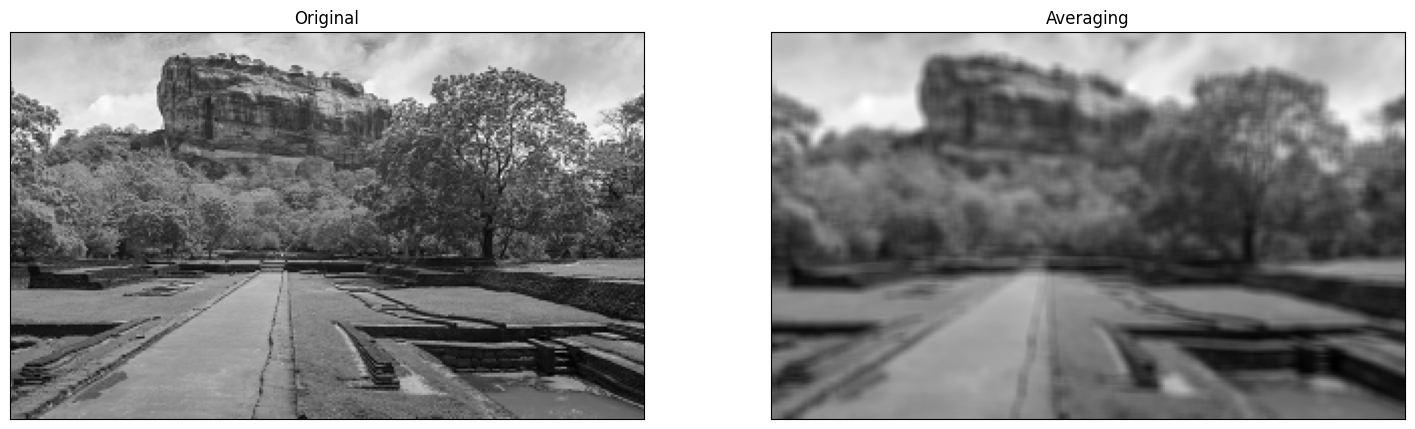

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('Images-20240703/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

k_size = 5
kernel = np.ones((k_size,k_size),np.float32)/9
imavg = cv.filter2D(im, cv.CV_32F, kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


### Sobel Filtering

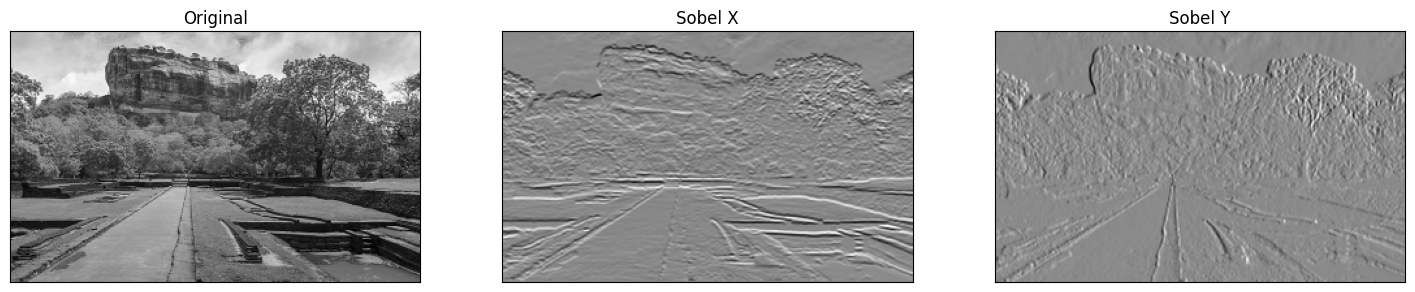

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('Images-20240703/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(im_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

DescribeResult(nobs=84135, minmax=(0, 73), mean=1.297462411600404, variance=13.521458723285198, skewness=6.147052889398213, kurtosis=55.430272139483776)


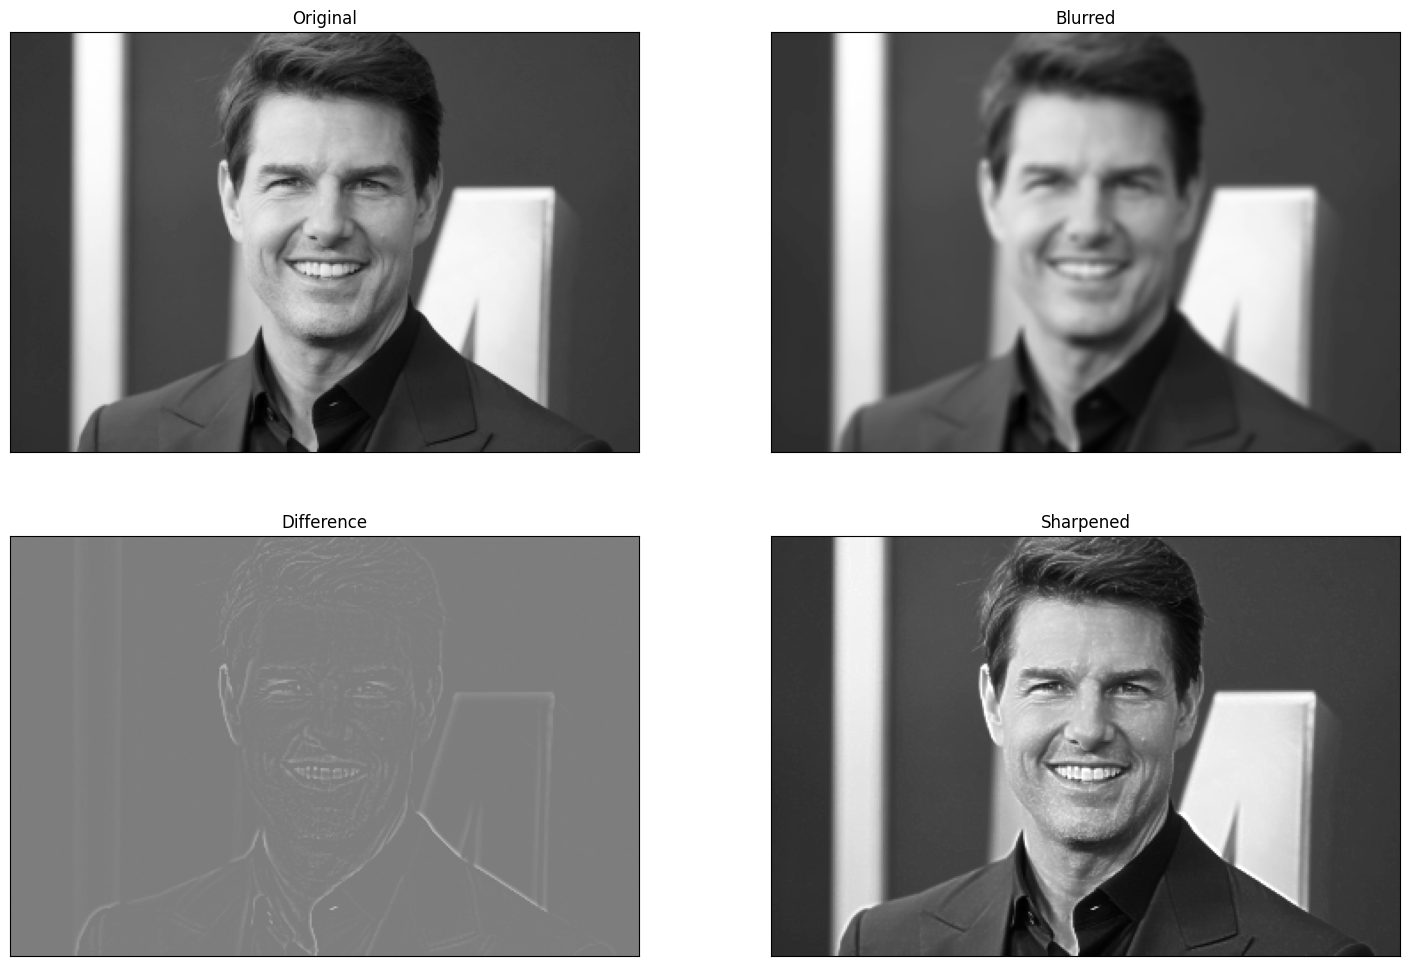

In [7]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('Images-20240703/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff =  cv.subtract(img, blurred)

sharpened = cv.addWeighted(img, 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,12))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()